# Analyze, identify patterns, and explore the data.

Analyzing data is important because it provides valuable insights and information that can drive decision-making and problem-solving. By analyzing data, patterns, trends, and correlations can be identified, enabling organizations to make informed decisions and predictions. Data analysis helps businesses understand their customers, optimize processes, identify opportunities, detect anomalies, and measure performance. It also supports evidence-based research and helps uncover relationships and causality between variables. Overall, data analysis empowers organizations to gain a competitive edge, improve efficiency, and make data-driven decisions.

## Libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [2]:
data = pd.read_csv('../data/cleaned_data.csv')

---

# Project Target (Time_taken(min))
The time taken by the delivery partner to complete the order

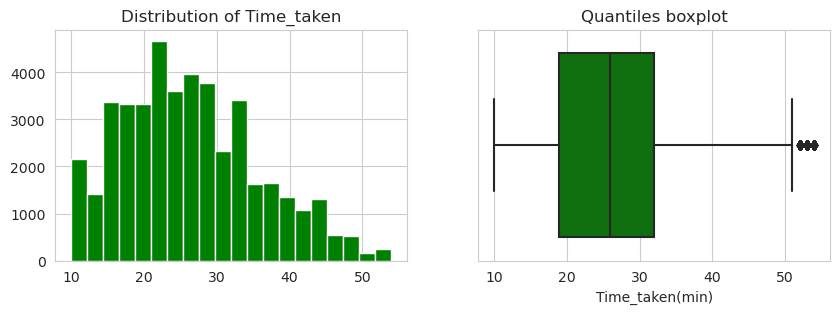

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.distplot(x = data['Time_taken(min)'], bins = 20,
             kde = False, hist_kws = {'alpha': 1}, color = 'green', ax = ax1)
ax1.set_title('Distribution of Time_taken')

sns.boxplot(data = data, x = 'Time_taken(min)', ax = ax2, color = 'green')
ax2.set_title('Quantiles boxplot');

In [4]:
data['Time_taken(min)'].describe().to_frame()[1:]

,Time_taken(min)
mean,26.293831
std,9.373765
min,10.000000
25%,19.000000
50%,26.000000
75%,32.000000
max,54.000000


In [5]:
# Quantile 0.99, outliers count
data['Time_taken(min)'].quantile(0.99), data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)].count()[0]

(49.0, 412)

In [6]:
data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)][['Weatherconditions', 'Road_traffic_density', 'Time_taken(min)']].mode()

,Weatherconditions,Road_traffic_density,Time_taken(min)
0,Fog,Jam,53.0


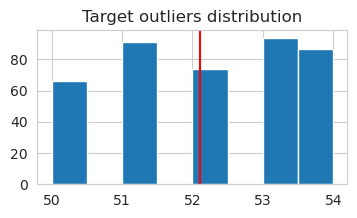

In [7]:
plt.figure(figsize = (4, 2))

sns.distplot(x = data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)]['Time_taken(min)'], hist_kws = {'alpha': 1}, kde = False)
plt.axvline(data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.99)]['Time_taken(min)'].mean(), color = 'red')
plt.title('Target outliers distribution');

In [8]:
# Quantile 0.15, fastest deliveries count
data['Time_taken(min)'].quantile(0.15), data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.15)].count()[0]

(16.0, 36920)

In [9]:
# Percentage of deliveries below 16 minutes
data[data['Time_taken(min)'] > data['Time_taken(min)'].quantile(0.15)].count()[0] / data.shape[0] * 100

84.17308832246592

In [10]:
data['Time_taken(min)'].min(), data['Time_taken(min)'].max() 

(10.0, 54.0)

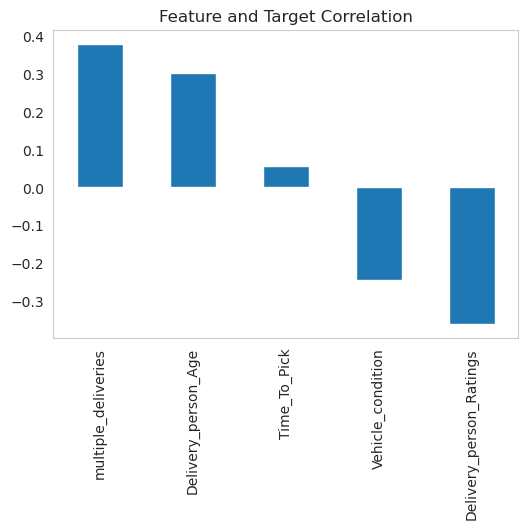

In [11]:
data.drop(['Order_Year', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude'], axis = 1).corr()['Time_taken(min)'].sort_values(ascending = False)[1:].plot(kind = 'bar',
                                                                       title = 'Feature and Target Correlation',
                                                                                                   figsize = (6, 4))

plt.grid(False);

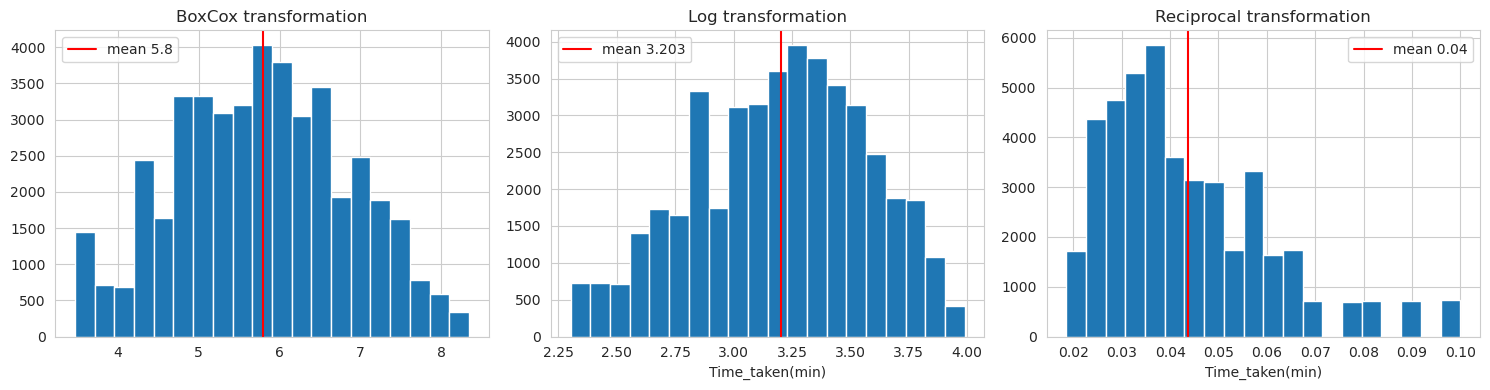

In [12]:
import scipy.stats as stats

TargetBoxCox, param = stats.boxcox(data['Time_taken(min)'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 4))

sns.distplot(TargetBoxCox, bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax1)
ax1.axvline(TargetBoxCox.mean(), color = 'red', label = f'mean {round(TargetBoxCox.mean(), 2)}')
ax1.set_title('BoxCox transformation')
ax1.legend(loc = 'upper left')

sns.distplot(np.log(data['Time_taken(min)']), bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax2)
ax2.axvline(np.log(data['Time_taken(min)']).mean(), color = 'red', label = f"mean {round(np.log(data['Time_taken(min)']).mean(), 3)}")
ax2.set_title('Log transformation')
ax2.legend(loc = 'upper left')

sns.distplot(1 / (data['Time_taken(min)']), bins = 20, kde = False, hist_kws = {'alpha': 1}, ax = ax3)
ax3.axvline((1 / (data['Time_taken(min)'])).mean(), color = 'red', label = f"mean {round((1 / (data['Time_taken(min)'])).mean(), 2)}")
ax3.set_title('Reciprocal transformation')
ax3.legend()

plt.tight_layout();

**Important finds:**
-  Target is a little right skewed
-  Skewness is cause due to outliers that are above the 0.99 quantile, meaning, 49 or more minutes do deliver the order.
-  Average weather conditions of those outliers was Fog,  traffic density Jam and the deliver time about 53 minutes.
-  More than 80% of the deliveries were made in 16 minutes or less.
-  Fastest delivery was 10 minutes and the slowest 54 minutes
-  The amount of deliveries and the ratings of the person delivering are key factors to the delivery time.

**Notes:**
- I might need to perform some transformation in order to normalise the target
- BoxCox transformation is the one that fits a better normal distribution.


# Descrete & Continuous Features

In [13]:
NumericalData = data.select_dtypes(exclude = 'O')

## Delivery_person_Age
Age of the delivery partner

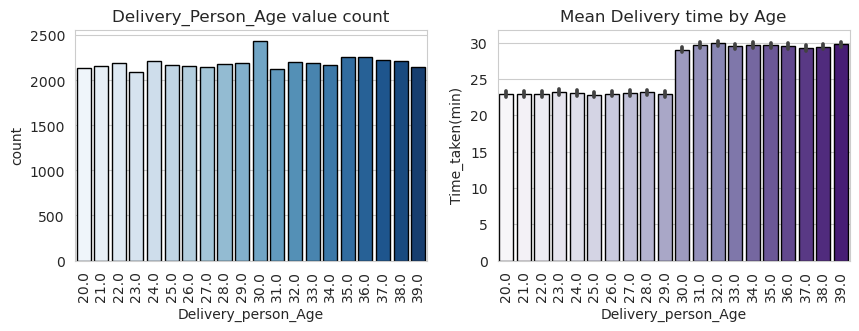

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.countplot(x = data['Delivery_person_Age'], ax = ax1, palette = 'Blues', edgecolor = 'k')
ax1.set_title('Delivery_Person_Age value count')

sns.barplot(data = data, x = 'Delivery_person_Age', y = 'Time_taken(min)', estimator = 'mean',
            ax = ax2, palette = 'Purples', edgecolor = 'k')
ax2.set_title('Mean Delivery time by Age')

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90);

In [15]:
data['Delivery_person_Age'].min(), data['Delivery_person_Age'].max()

(20.0, 39.0)

In [16]:
Younger = data[data['Delivery_person_Age'] < 30]
Older = data[data['Delivery_person_Age'] >= 30]

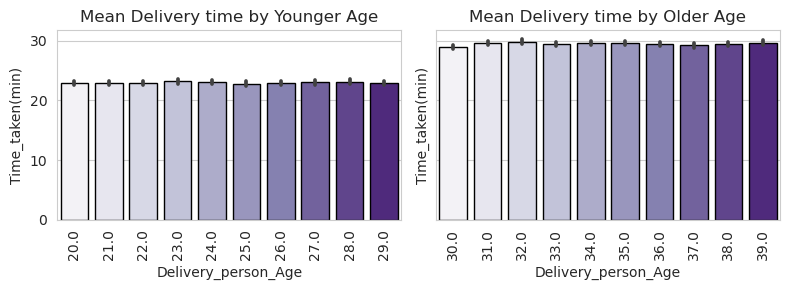

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (8, 3), sharey = True)

sns.barplot(data = Younger, x = 'Delivery_person_Age', y = 'Time_taken(min)', estimator = 'mean',
            ax = ax1, palette = 'Purples', edgecolor = 'k')
ax1.set_title('Mean Delivery time by Younger Age')

sns.barplot(data = Older, x = 'Delivery_person_Age', y = 'Time_taken(min)', estimator = 'mean',
            ax = ax2, palette = 'Purples', edgecolor = 'k')
ax2.set_title('Mean Delivery time by Older Age')

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.tight_layout();

In [18]:
Younger['Time_taken(min)'].mean(), Older['Time_taken(min)'].mean() 

(22.98969262768662, 29.50996535744815)

In [19]:
data['AgeBucked'] = data['Delivery_person_Age'].apply(lambda value: 'Younger' if value < 30 else 'Older') 

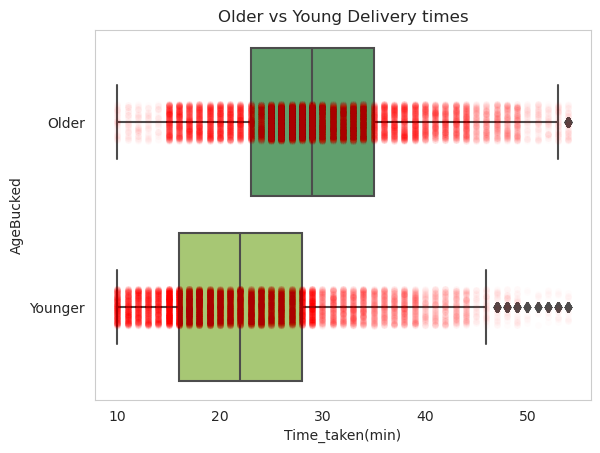

In [20]:
sns.boxplot(data = data, y = 'AgeBucked', x = 'Time_taken(min)', palette = 'summer')
sns.stripplot(data = data, y = 'AgeBucked', x = 'Time_taken(min)', color = 'red', alpha = 0.01)

plt.title('Older vs Young Delivery times')
plt.grid(False);

In [21]:
AgeStatistics = data.drop(['Restaurant_latitude', 'Restaurant_longitude',
           'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_To_Pick','Order_Year'], axis = 1).groupby('Delivery_person_Age').mean()

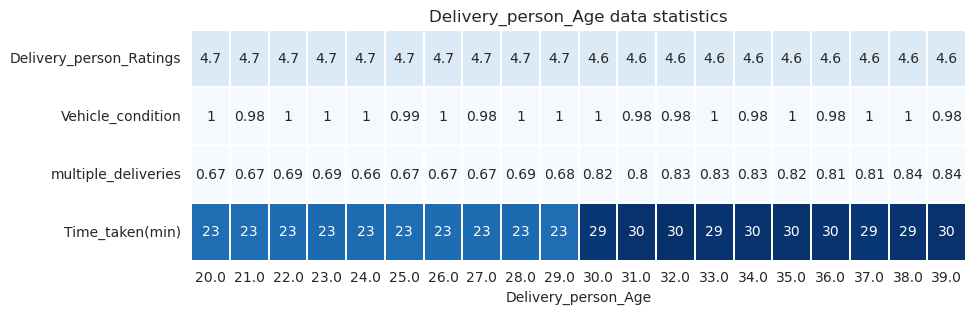

In [22]:
plt.figure(figsize = (10, 3))
sns.heatmap(AgeStatistics.T, cmap = 'Blues', annot = True, cbar = False, linewidths = 0.1)
plt.title('Delivery_person_Age data statistics');

In [23]:
Younger['multiple_deliveries'].mean(), Older['multiple_deliveries'].mean()

(0.6746937832216316, 0.8225581499977505)

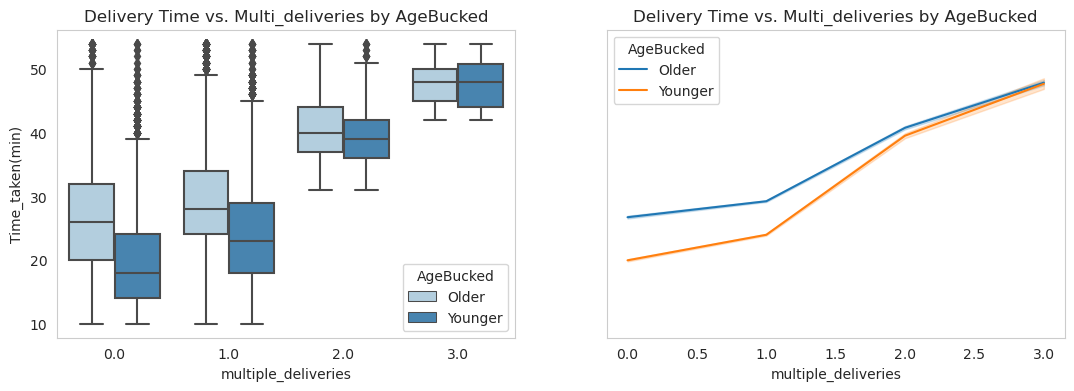

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, sharey = True, figsize = (13, 4))

sns.boxplot(data = data, hue = 'AgeBucked', y = 'Time_taken(min)', x = 'multiple_deliveries', palette = 'Blues', ax = ax1)
ax1.set_title('Delivery Time vs. Multi_deliveries by AgeBucked')

sns.lineplot(data = data, x = 'multiple_deliveries', y = 'Time_taken(min)', hue = 'AgeBucked', ax = ax2)
ax2.set_title('Delivery Time vs. Multi_deliveries by AgeBucked')

ax1.grid(False)
ax2.grid(False);

In [25]:
del Younger
del Older
del AgeStatistics
data = data.drop('AgeBucked', axis = 1)

**Important finds:**
-  Distribution of Age has no pattern, there is around 2000 people of each age delivering. 
-  The Age ranges between 20 and 39.
-  Deliver times are higher in Delivery_person older than 30, this means that  even whhen age has no distribution, it has a cutting point that can actually be usefull at some point.
-  Mean delivery time of those Delivery_person younger than 30 is 22 minutes, while those Delivery_person older than 30 is about 29 minutes. 
-  Younger than 30 Delivery_person has a lot of outliers in the delivery time, while Older than 30 Delivery_person barely has outliers. This indicate me that high delivery times in Older than 30 Delivery_person is quite usual.
-  Older than 30 Delivery_person usually takes more deliveries than younger than 30 Delivery_person does, this might be the reason why usually older people deliveries take longer times.
-  Older than 30 Delivery_person takes more time than Younger than 30 Delivery_person even in those single deliveries.
-  Besides multiple_deliveries, data statistics look very similar across all the numerical variables.

**Notes:**
-  Since people older than 30 have higher delivery times (therefore people younger than 30 have lower delivery times) it might be a good idea to bucket Delivery_person_Age into two bins: YoungerThan30 (Delivery_person < 30) and OlderThan30 (Delivery_person >= 30).

## Delivery_person_Ratings	

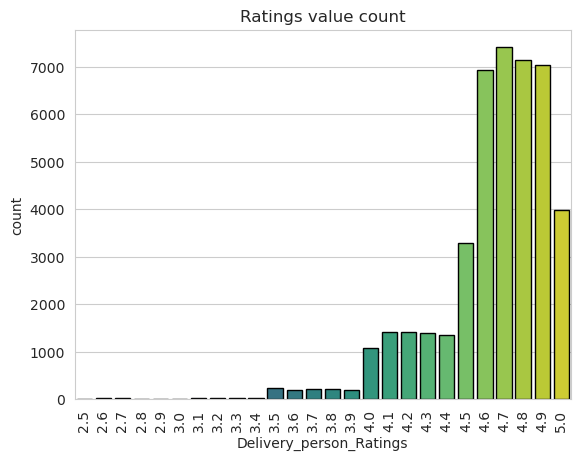

In [26]:
sns.countplot(data = data, x = 'Delivery_person_Ratings', palette = 'viridis', edgecolor = 'k')
plt.xticks(rotation = 90)
plt.title('Ratings value count');

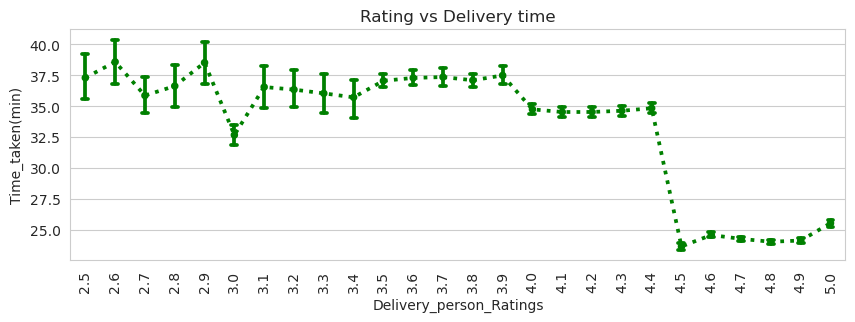

In [27]:
plt.figure(figsize = (10 , 3))

sns.pointplot(data = data, x = 'Delivery_person_Ratings', y = 'Time_taken(min)', capsize = .2,
              linestyles = ':', markers = '.', color = 'green')

plt.xticks(rotation = 90)
plt.title('Rating vs Delivery time');

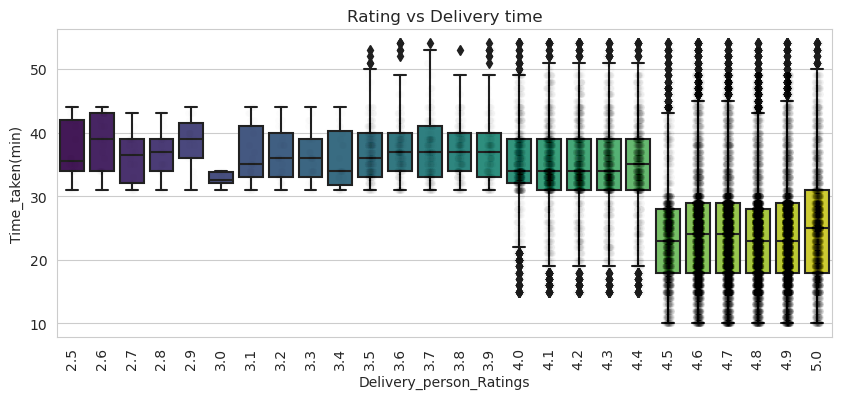

In [28]:
plt.figure(figsize = (10 , 4))

sns.boxplot(data = data, x = 'Delivery_person_Ratings', y = 'Time_taken(min)', palette = 'viridis')
sns.stripplot(data = data, x = 'Delivery_person_Ratings', y = 'Time_taken(min)', color = 'k', alpha = 0.01)


plt.xticks(rotation = 90)
plt.title('Rating vs Delivery time');

In [29]:
Below45 = data[data['Delivery_person_Ratings'] < 4.5]
Above45 = data[data['Delivery_person_Ratings'] >= 4.5]

In [30]:
Below45['Time_taken(min)'].mean(), Above45['Time_taken(min)'].mean()

(35.06119142572283, 24.33084993582231)

In [31]:
data['Delivery_person_Ratings'].describe()[1:].to_frame()

,Delivery_person_Ratings
mean,4.635682
std,0.312907
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,5.000000


In [32]:
data['RatingDiff'] = data['Delivery_person_Ratings'].apply(lambda value: 'Below 4.5' if value < 4.5 else 'Above 4.5') 

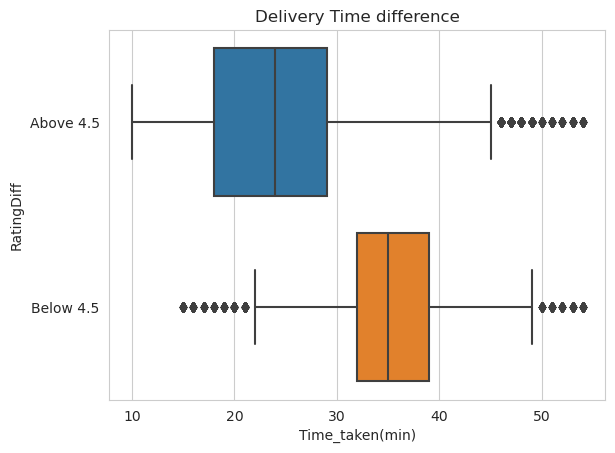

In [33]:
sns.boxplot(data = data, y = 'RatingDiff', x = 'Time_taken(min)')

plt.title('Delivery Time difference');

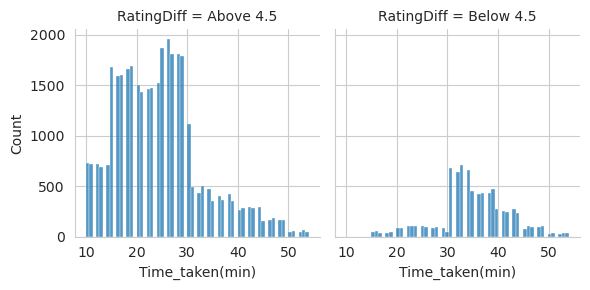

In [34]:
sns.FacetGrid(data, col = "RatingDiff").map_dataframe(sns.histplot, x = "Time_taken(min)");

In [35]:
RatingStatistics = data.drop(['Restaurant_latitude', 'Restaurant_longitude',
           'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_To_Pick', 'Order_Year'], axis = 1).groupby('Delivery_person_Ratings').mean()

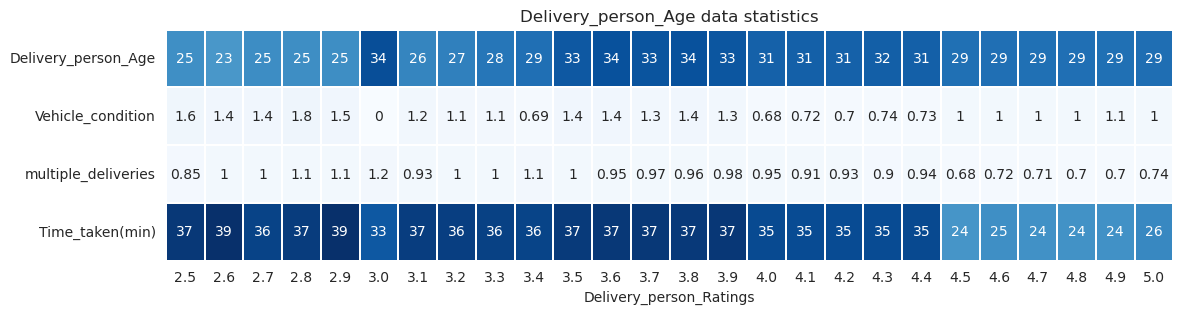

In [36]:
plt.figure(figsize = (13, 3))
sns.heatmap(RatingStatistics.T, cmap = 'Blues', annot = True, cbar = False, linewidths = 0.1)
plt.title('Delivery_person_Age data statistics');

In [37]:
data.groupby('Delivery_person_Ratings').count()['ID'].to_frame().T

Delivery_person_Ratings,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
ID,20,22,22,19,19,6,29,29,25,32,249,207,225,228,197,1077,1430,1418,1409,1361,3303,6940,7410,7148,7041,3996


In [38]:
del Below45
del Above45
del RatingStatistics
data = data.drop('RatingDiff', axis = 1)

**Important finds:**
-  Vast majority of the driver have a higher than 4.0 rating.
-  Ranting ranges between 2.5 and 5.0, and mean rating is 4.7
-  The lower the rating the slower the delivery.
-  Delivey_person with rating below 4.5 have an average delivery time of 35 minutes, while those with higher rating than 4.5 have around 24 minutes.
-  Low rating person is usually younger than those with high ratings
-  There is barely no people with rating lower than 3.5 (Less than 200, therefore less than 0.004%)

**Notes:**
-  It is obvius that people with less rating have higher delivery times, but since is barely no delivery_person with this low rates, the person rating may not impact as much as I am thinking the model performace.

## Restaurant_latitude, Restaurant_longitude & Delivery_location_latitude, Delivery_location_longitude

I need to calculate the distance between the restaurant and the delivery location, I can do that using the haversine formula

In [39]:
def ToRadians(degrees):
    return degrees * (np.pi / 180)

def distcalculate(latitude1, longitude1, latitude2, longitude2, R = 6371):
    
    latitude = ToRadians(latitude2 - latitude1)
    
    longitude = ToRadians(longitude2 - longitude1)
    
    a = np.sin(latitude / 2) ** 2 + np.cos(ToRadians(latitude1)) * np.cos(ToRadians(latitude2)) * np.sin(longitude / 2) ** 2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c

In [40]:
data['DeliveryDistance'] = np.nan

for index in range(len(data)):
    data.loc[index, 'DeliveryDistance'] = distcalculate(data.loc[index, 'Restaurant_latitude'], 
                                        data.loc[index, 'Restaurant_longitude'], 
                                        data.loc[index, 'Delivery_location_latitude'], 
                                        data.loc[index, 'Delivery_location_longitude'])

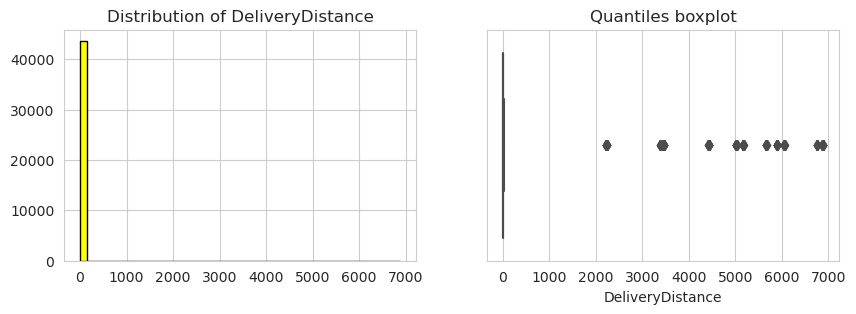

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.distplot(x = data['DeliveryDistance'],
             kde = False, hist_kws = {'alpha': 1, 'edgecolor':'black'}, color = 'yellow', ax = ax1)
ax1.set_title('Distribution of DeliveryDistance')

sns.boxplot(data = data, x = 'DeliveryDistance', ax = ax2, color = 'yellow')
ax2.set_title('Quantiles boxplot');

In [42]:
data['DeliveryDistance'].describe(include = 'all').to_frame()[1:]

,DeliveryDistance
mean,27.170206
std,303.076394
min,1.465067
25%,4.663432
50%,9.220419
75%,13.682165
max,6884.726399


In [43]:
Quantile99 = data['DeliveryDistance'].quantile(0.99)
Quantile99

20.851726357533593

In [44]:
data[data['DeliveryDistance'] > Quantile99][['Restaurant_latitude', 'Restaurant_longitude',
                                                                          'Delivery_location_latitude', 'Delivery_location_longitude',
                                                                         'Time_taken(min)', 'DeliveryDistance']].head()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),DeliveryDistance
90,-27.163303,78.057044,27.233303,78.127044,15.0,6048.631240
221,26.846156,75.802300,26.986156,75.942300,37.0,20.857115
276,-27.165108,78.015053,27.225108,78.075053,31.0,6047.919478
281,26.849596,75.800512,26.989596,75.940512,42.0,20.856834
450,26.888420,75.800689,27.028420,75.940689,42.0,20.853654


In [45]:
OutliersIndex = data[data['DeliveryDistance'] > Quantile99].index

In [46]:
for index in OutliersIndex:

    distance = data[data['Time_taken(min)'] == data.iloc[index]['Time_taken(min)']].groupby('Time_taken(min)').mean()['DeliveryDistance'].values[0]
    
    data.at[index, 'DeliveryDistance'] = distance

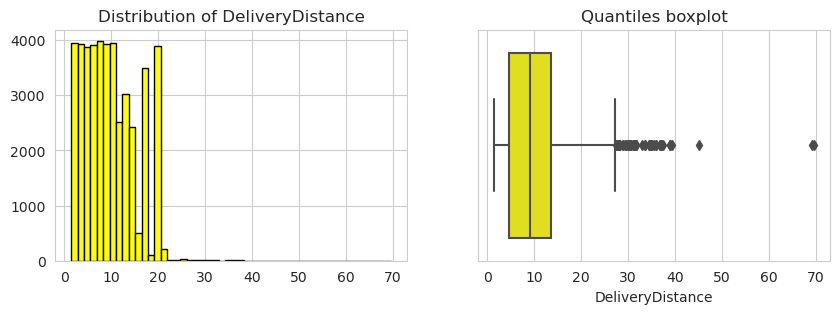

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.distplot(x = data['DeliveryDistance'],
             kde = False, hist_kws = {'alpha': 1, 'edgecolor':'black'}, color = 'yellow', ax = ax1)
ax1.set_title('Distribution of DeliveryDistance')

sns.boxplot(data = data, x = 'DeliveryDistance', ax = ax2, color = 'yellow')
ax2.set_title('Quantiles boxplot');

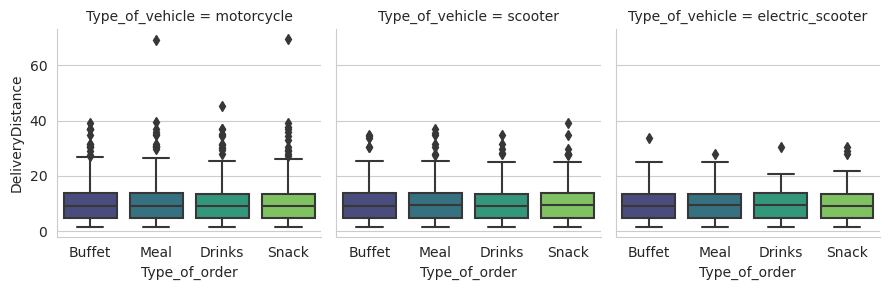

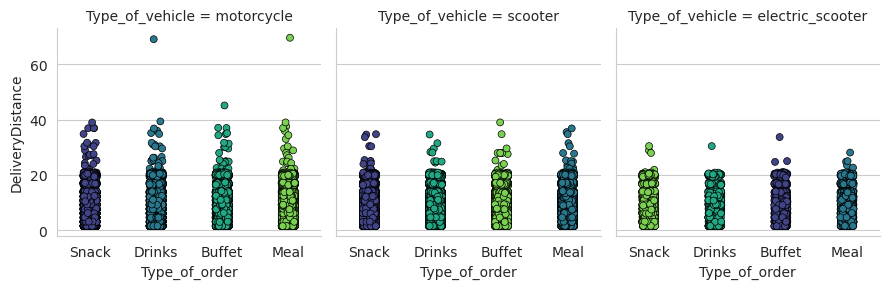

In [48]:
sns.FacetGrid(data, col = "Type_of_vehicle").map_dataframe(sns.boxplot, y = "DeliveryDistance", x = "Type_of_order", palette = 'viridis')
sns.FacetGrid(data, col = "Type_of_vehicle",).map_dataframe(sns.stripplot, y = "DeliveryDistance", x = "Type_of_order", palette = 'viridis', 
              jitter = True, edgecolor = 'k', linewidth = 0.5)

plt.tight_layout();

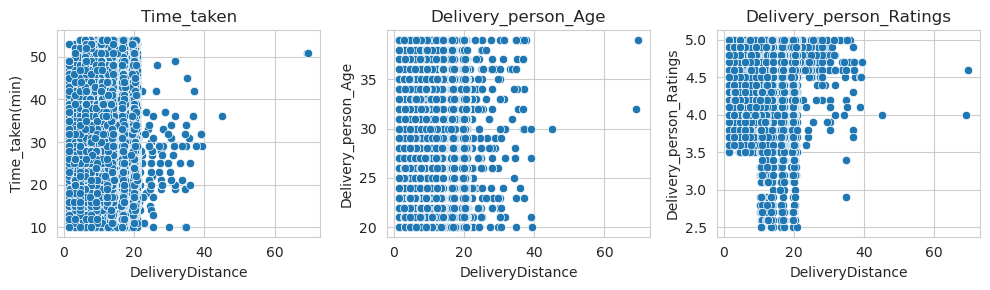

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3))

sns.scatterplot(data = data, x = 'DeliveryDistance', y = 'Time_taken(min)', ax = ax1)
ax1.set_title('Time_taken')

sns.scatterplot(data = data, x = 'DeliveryDistance', y = 'Delivery_person_Age', ax = ax2)
ax2.set_title('Delivery_person_Age')

sns.scatterplot(data = data, x = 'DeliveryDistance', y = 'Delivery_person_Ratings', ax = ax3)
ax3.set_title('Delivery_person_Ratings')

plt.tight_layout();

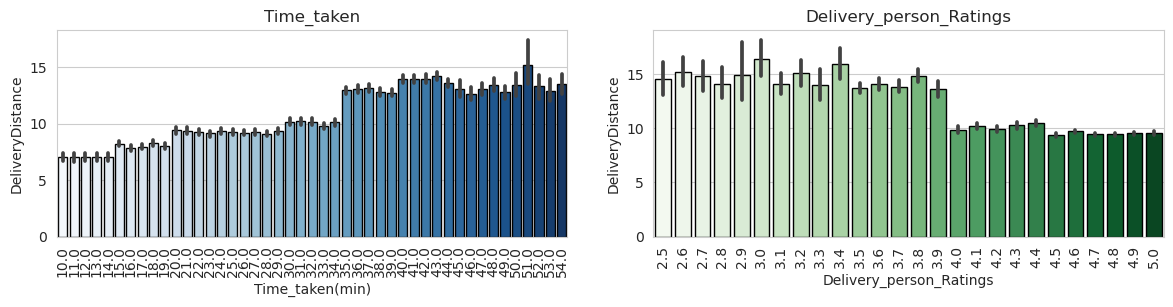

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 3))

sns.barplot(data = data, y = 'DeliveryDistance', x = 'Time_taken(min)', ax = ax1, palette = 'Blues', edgecolor = 'k')
ax1.set_title('Time_taken')

sns.barplot(data = data, y = 'DeliveryDistance', x = 'Delivery_person_Ratings', ax = ax2, palette = 'Greens', edgecolor = 'k')
ax2.set_title('Delivery_person_Ratings')

plt.tight_layout()

for ax in [ax1, ax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90);

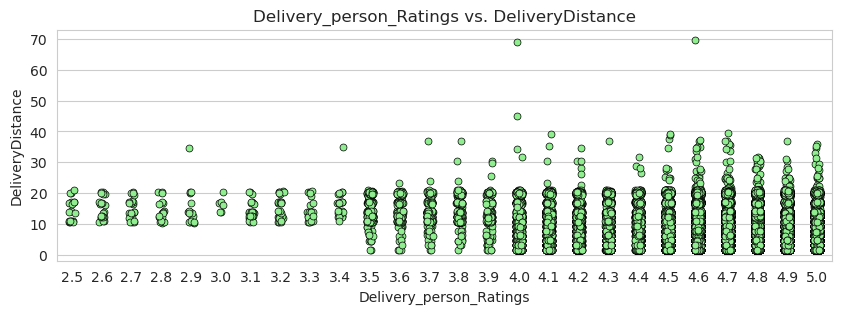

In [51]:
plt.figure(figsize = (10, 3))
sns.stripplot(data = data, x = 'Delivery_person_Ratings', y = 'DeliveryDistance', 
              jitter = True, edgecolor = 'k', linewidth = 0.5, color = 'lightgreen')
plt.title('Delivery_person_Ratings vs. DeliveryDistance');

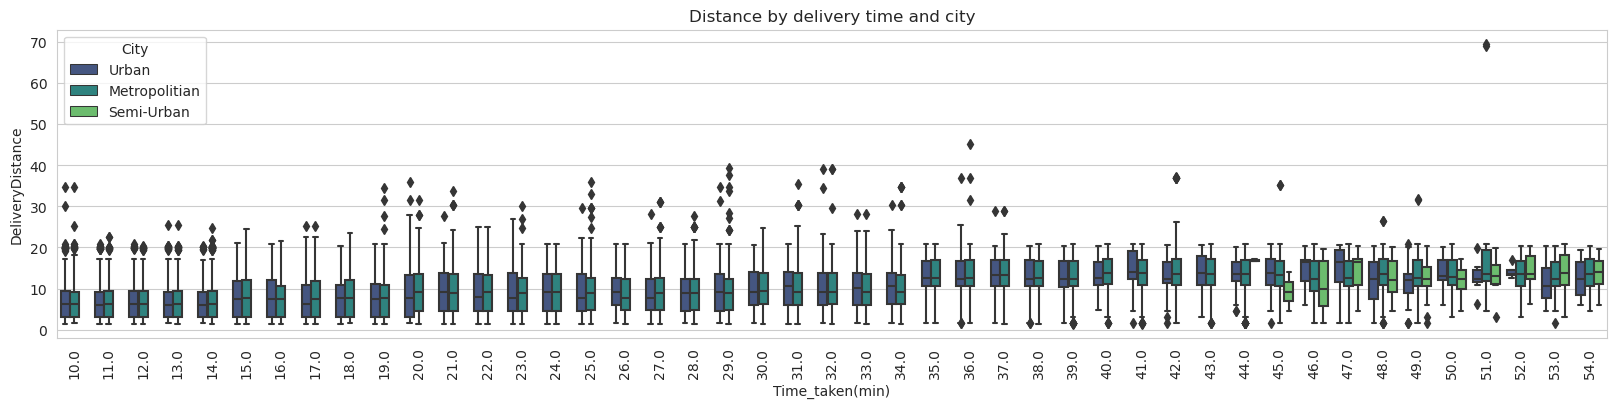

In [52]:
plt.figure(figsize = (20, 4))
sns.boxplot(data = data, hue = 'City', x = 'Time_taken(min)', y = 'DeliveryDistance', palette = 'viridis')
plt.title('Distance by delivery time and city')
plt.xticks(rotation = 90);

In [53]:
plt.figure(figsize = (10, 3))
data.groupby('City').mean()[['Time_taken(min)', 'DeliveryDistance']]

,Time_taken(min),DeliveryDistance
City,,
Metropolitian,27.133123,9.930398
Semi-Urban,49.737179,12.963577
Urban,23.000000,9.127748


<Figure size 1000x300 with 0 Axes>

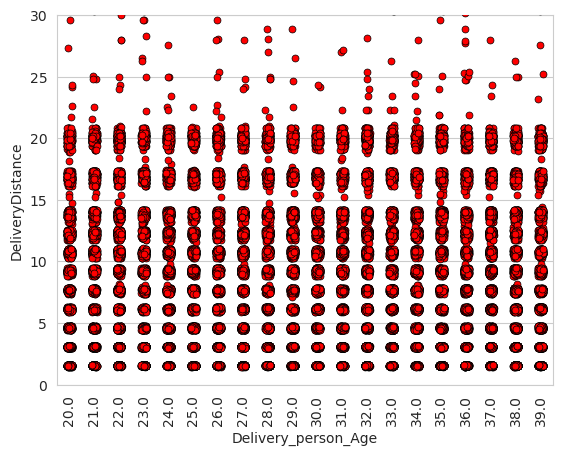

In [54]:
sns.stripplot(data = data, x = 'Delivery_person_Age', y = 'DeliveryDistance', 
              jitter = True, edgecolor = 'k', linewidth = 0.5, color = 'red')
plt.xticks(rotation = 90)
plt.ylim(0, 30);

In [55]:
data['DeliveryDistance'].describe()[1:].to_frame()

,DeliveryDistance
mean,9.762584
std,5.674349
min,1.465067
25%,4.663432
50%,9.220398
75%,13.681416
max,69.630124


**Important finds:**
-  DeliveryDistance have a lot of outliers that does not represent the real distance, this outliers are affecting the mean and standard deviation, median is about 9.22km which is more usual.
-  This outliers are caused due to an error in the formula or probably they are using a VPN. (Outliers remapped)
-  After the transformation of the outliers Ithere still some large values but more realistic acording to the distribution.
- Average distance increases with the time taken
-  Most of the DeliveryDistances ranges between 1 and 20 km.
-  High rating delivery person usually takes low distance deliveries.
-   Semi-Urban deliveries usually takes around 45 minutes or more.


**Notes:**
-   I mapped the outliers as a missing value then imputed them with the mean by delivery time.
-   With the replacement of the outliers I mananged to reduce the standard deviation and have a more equal mean and median. 

## Vehicle_condition
Condition of the vehicle

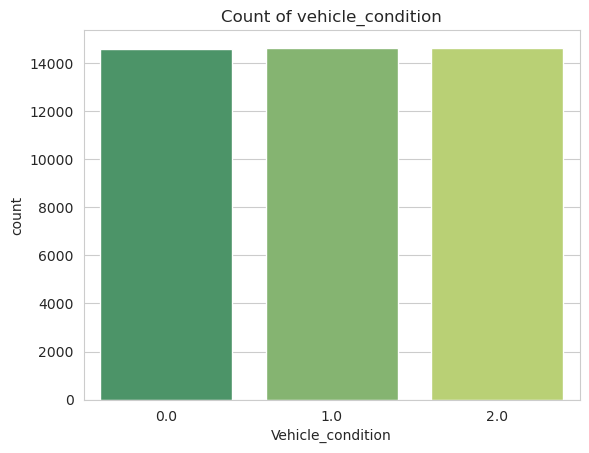

In [56]:
sns.countplot(data = data, x = 'Vehicle_condition', palette = 'summer')
plt.title('Count of vehicle_condition');

In [57]:
data['Vehicle_condition'].value_counts().to_frame()

,Vehicle_condition
2.0,14642
1.0,14617
0.0,14603


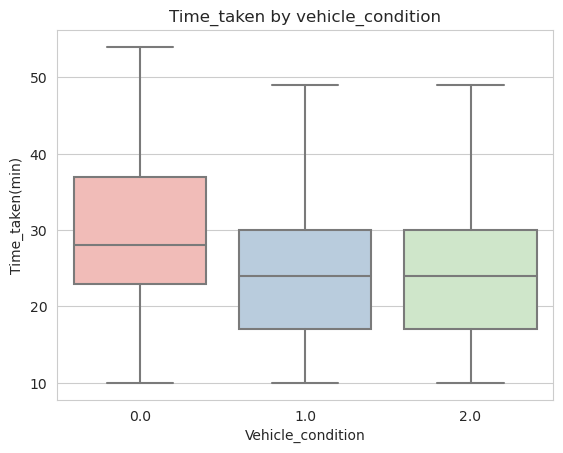

In [58]:
sns.boxplot(data = data, y = 'Time_taken(min)', x = 'Vehicle_condition', palette = 'Pastel1')
plt.title('Time_taken by vehicle_condition');

In [59]:
ConditionStatistics = data.drop(['Restaurant_latitude', 'Restaurant_longitude',
           'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_To_Pick', 'Order_Year'], axis = 1).groupby('Vehicle_condition').mean()

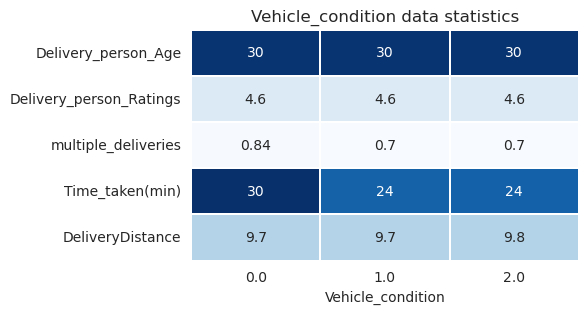

In [60]:
plt.figure(figsize = (5, 3))
sns.heatmap(ConditionStatistics.T, cmap = 'Blues', annot = True, cbar = False, linewidths = 0.1)
plt.title('Vehicle_condition data statistics');

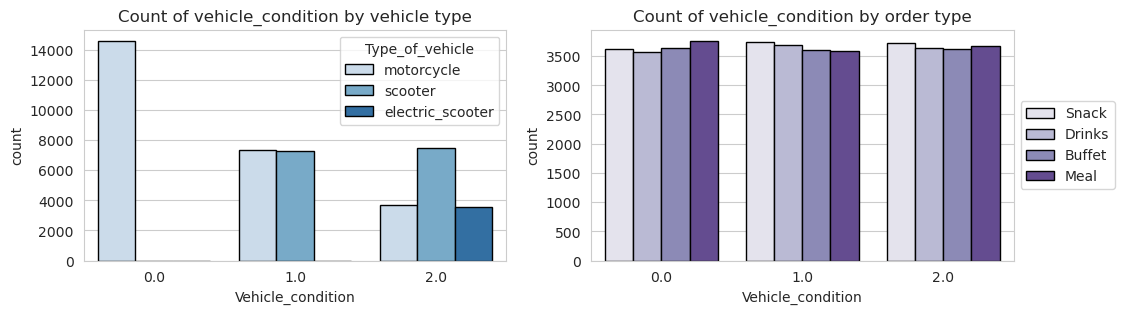

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 3))

sns.countplot(data = data, x = 'Vehicle_condition', hue = 'Type_of_vehicle', palette = 'Blues', edgecolor = 'k', ax = ax1)
ax1.set_title('Count of vehicle_condition by vehicle type')
sns.countplot(data = data, x = 'Vehicle_condition', hue = 'Type_of_order', palette = 'Purples', edgecolor = 'k', ax = ax2)
ax2.set_title('Count of vehicle_condition by order type')

ax2.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [62]:
data.groupby(['Type_of_vehicle', 'Vehicle_condition']).count()['ID'].unstack().fillna('-')

Vehicle_condition,0.0,1.0,2.0
Type_of_vehicle,,,
electric_scooter,-,-,3534.0
motorcycle,14603.0,7373.0,3657.0
scooter,-,7244.0,7451.0


In [63]:
del ConditionStatistics

**Important finds:**
-  Condition of the vehicle are balanced, all 3 conditions have around 14k obsevations.
-  Data statistics look pretty much the same through all the conditions.
-  All of 0.0 vehicle condition are motorcycles and there is only 2.0 vehicle_condition electric_scooter.

**Notes:**
-   From the EDA I don't think vehicle_condition has that much impact in the target, but it might help another feature predict the target.

## multiple_deliveries
Amount of deliveries driver picked

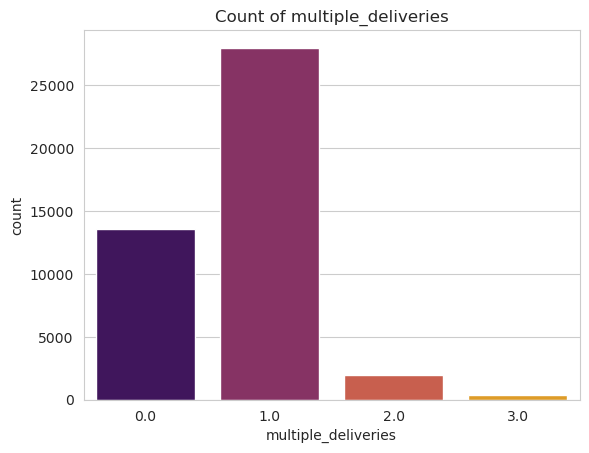

In [64]:
sns.countplot(data = data, x = 'multiple_deliveries', palette = 'inferno')
plt.title('Count of multiple_deliveries');

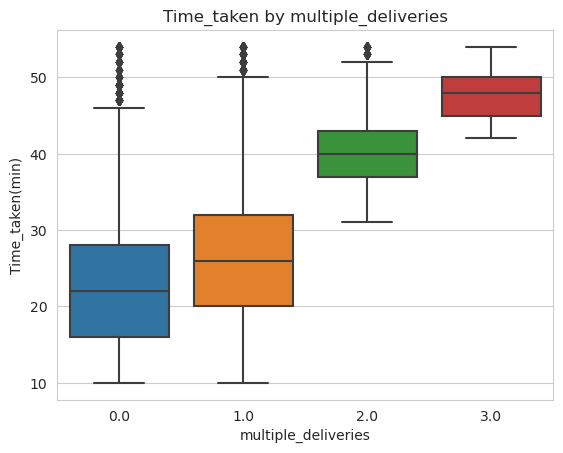

In [65]:
sns.boxplot(data = data, y = 'Time_taken(min)', x = 'multiple_deliveries')
plt.title('Time_taken by multiple_deliveries');

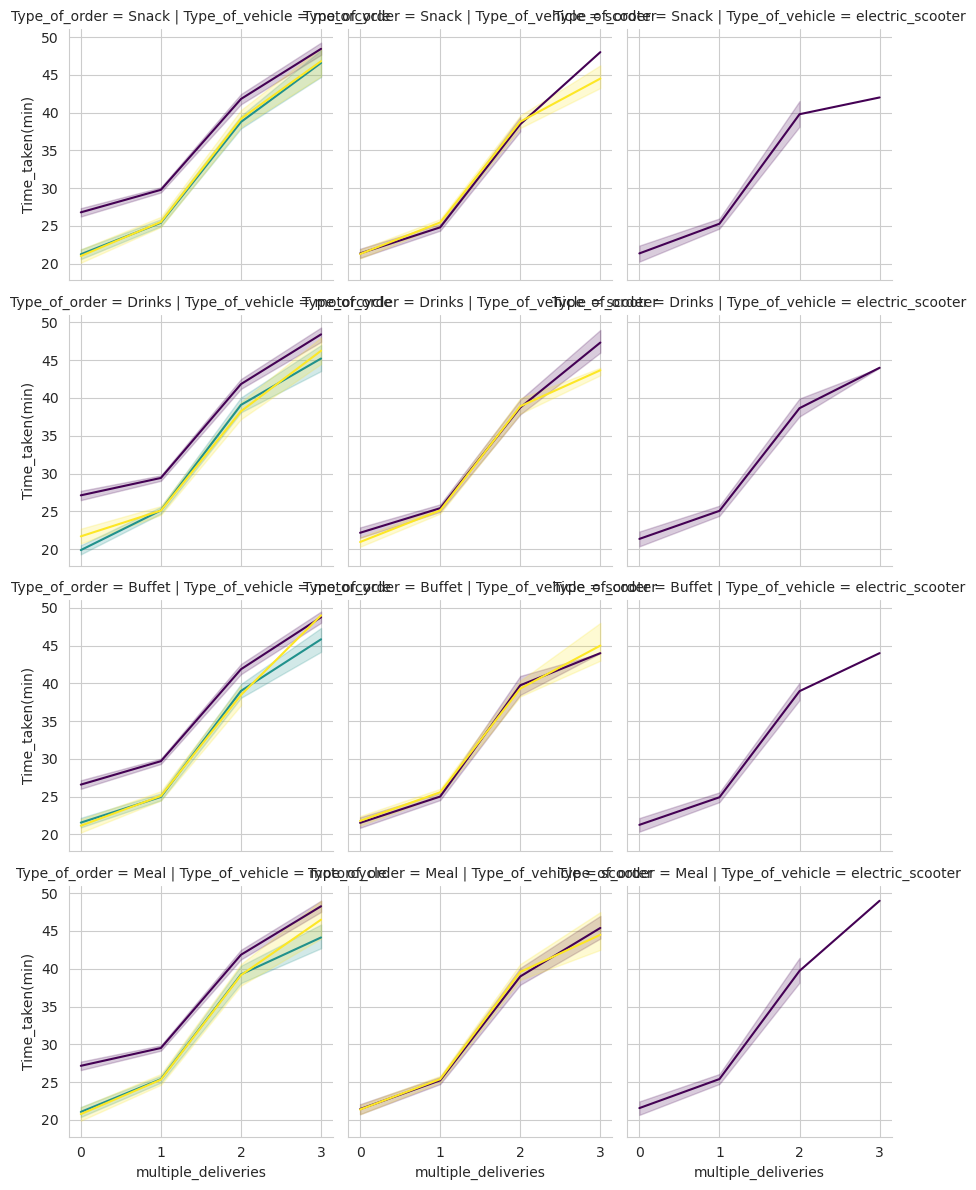

In [66]:
sns.FacetGrid(data, col = "Type_of_vehicle", row = "Type_of_order").map_dataframe(sns.lineplot, y = "Time_taken(min)", x = "multiple_deliveries",
                                                                                  palette = 'viridis', hue = 'Vehicle_condition')

plt.tight_layout();

In [67]:
data['multiple_deliveries'].value_counts().to_frame()

,multiple_deliveries
1.0,28011
0.0,13588
2.0,1920
3.0,343


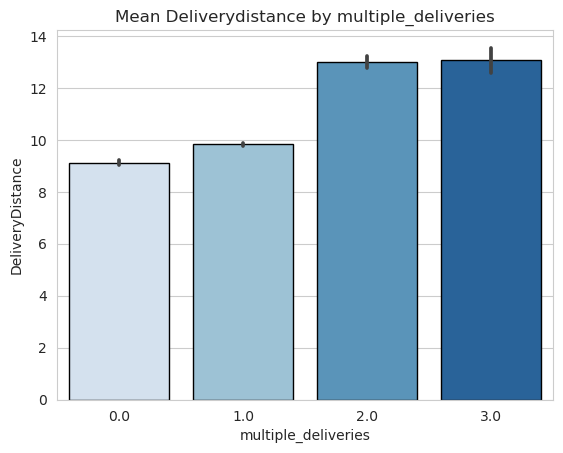

In [68]:
sns.barplot(data = data, x = 'multiple_deliveries', y = 'DeliveryDistance', palette = 'Blues', edgecolor = 'k')
plt.title('Mean Deliverydistance by multiple_deliveries');

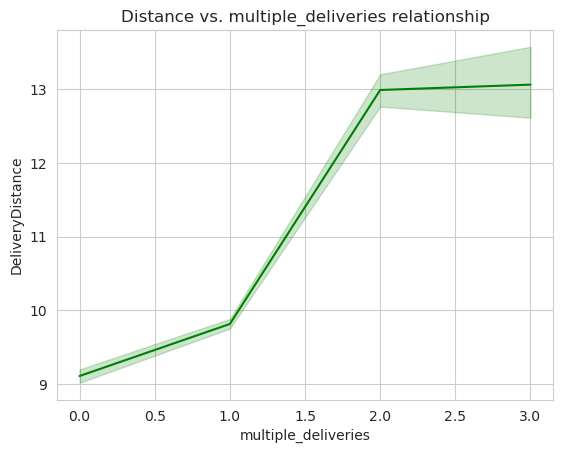

In [69]:
sns.lineplot(data = data, x = 'multiple_deliveries', y = 'DeliveryDistance', color = 'green')
plt.title('Distance vs. multiple_deliveries relationship');

In [70]:
DeliveriesStatistics = data.drop(['Restaurant_latitude', 'Restaurant_longitude',
           'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Year', 'Time_To_Pick'], axis = 1).groupby('multiple_deliveries').mean()

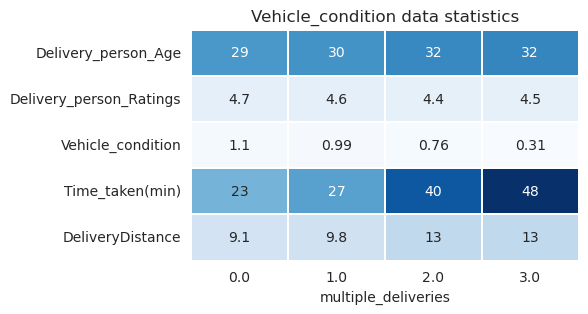

In [71]:
plt.figure(figsize = (5, 3))
sns.heatmap(DeliveriesStatistics.T, cmap = 'Blues', annot = True, cbar = False, linewidths = 0.1)
plt.title('Vehicle_condition data statistics');

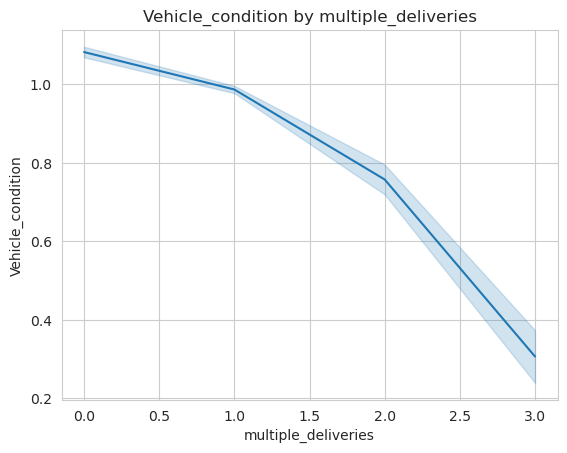

In [72]:
sns.lineplot(data = data, x = 'multiple_deliveries', y = 'Vehicle_condition')
plt.title('Vehicle_condition by multiple_deliveries');

In [73]:
del DeliveriesStatistics

**Important finds:**
-  Most of the delivery_person were carrying one or two orders
-  There is a linear relationship between the multiple_deliveries and all the delivery possible scenarios, where, the more deliveries the higher the amount of multiple_deliveries, the higher the time_taken/distance.
-  In average the more multiple_deliveries the more Distance the delivery_person has to travel.
-  Up to 2 multiple_deliveries is the peak for distance traveled
-  The higher the multiple_deliveries the worst Vehicle_condition.

**Notes:**
-   Multiple_deliveries has a lot of correlations with the data, it would be good to explore some engineering methods to take more information out of this feature.

## Time_To_Pick
Time the delivery_person took to pick order from the restaurant.

In [74]:
data['Time_To_Pick'].value_counts().to_frame()

,Time_To_Pick
5.0,14564
10.0,14288
15.0,14179
-1425.0,431
-1430.0,261
-1435.0,139


In [75]:
pd.concat([data[data['Time_To_Pick'] == -1425.0][['Time_Orderd', 'Time_Order_picked', 'Time_To_Pick']].head(1),
           data[data['Time_To_Pick'] ==  -1430.0][['Time_Orderd', 'Time_Order_picked', 'Time_To_Pick']].head(1),
           data[data['Time_To_Pick'] ==  -1435.0][['Time_Orderd', 'Time_Order_picked', 'Time_To_Pick']].head(1)])

,Time_Orderd,Time_Order_picked,Time_To_Pick
73,2022-03-05 23:50:00,2022-03-05 00:05:00,-1425.0
160,2022-04-04 23:50:00,2022-04-04 00:00:00,-1430.0
382,2022-02-12 23:55:00,2022-02-12 00:00:00,-1435.0


In [76]:
data['Time_To_Pick'] = data['Time_To_Pick'].apply(
    lambda value: value if value not in [-1425.0, -1430.0, -1435.0] else 15.0 if value == -1425.0 else 10.0 if value == -1430.0 else 5.0)

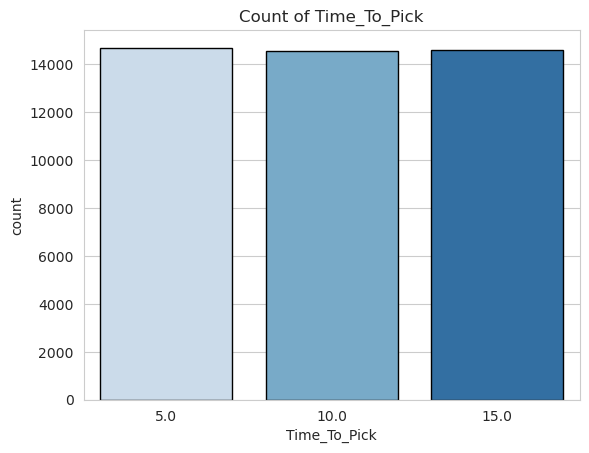

In [77]:
sns.countplot(data = data, x = 'Time_To_Pick', palette = 'Blues', edgecolor = 'k')
plt.title('Count of Time_To_Pick');

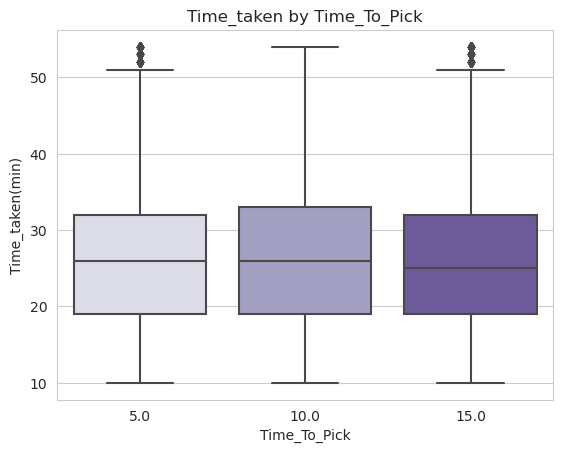

In [78]:
sns.boxplot(data = data, y = 'Time_taken(min)', x = 'Time_To_Pick', palette = 'Purples')
plt.title('Time_taken by Time_To_Pick');

In [79]:
data.drop(['Restaurant_latitude', 'Restaurant_longitude',
           'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Year'], axis = 1).groupby('Time_To_Pick').mean()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),DeliveryDistance
Time_To_Pick,,,,,,
5.0,29.623274,4.634959,0.997552,0.753248,26.352785,9.759391
10.0,29.539419,4.634071,0.995807,0.748711,26.370541,9.760878
15.0,29.508350,4.638015,1.009309,0.746886,26.158111,9.767495


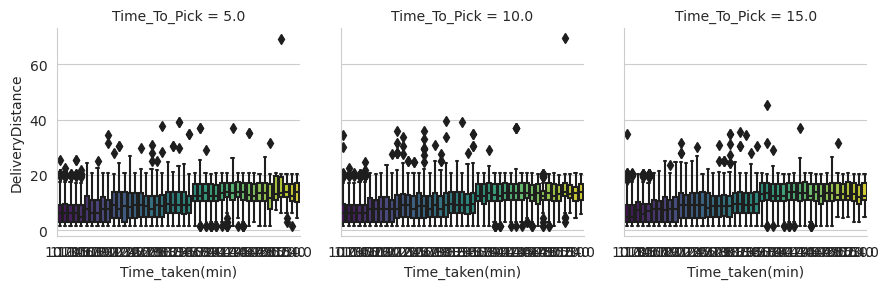

In [80]:
sns.FacetGrid(data, col = "Time_To_Pick").map_dataframe(sns.boxplot, y = "DeliveryDistance", x = "Time_taken(min)", palette = 'viridis')

plt.tight_layout();

**Important finds:**
-  Time_To_Pick have some values with arbitrary values.
-  TIme_To_Pick values are equally distributed.
-  Statistics are pretty much the same for all the features of the 3 picked time

**Notes:**
-   The arbitrary values was due to change of day, I managed to repleace those values.
-   TIme_To_Pick has few to none value in the dataset, it might be a good option to remove it in order to improve training times.

# Binary & Categorical Features

In [81]:
CategoricalData = data.select_dtypes(include = 'O')

## Weatherconditions

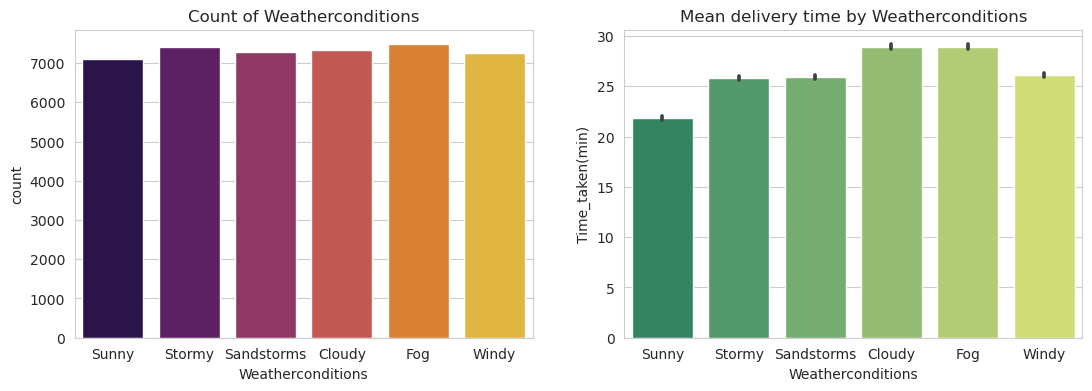

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (13, 4))

sns.countplot(data = data, x = 'Weatherconditions', palette = 'inferno', ax = ax1)
ax1.set_title('Count of Weatherconditions')
sns.barplot(data = data, x = 'Weatherconditions', y = 'Time_taken(min)', palette = 'summer', ax = ax2)
ax2.set_title('Mean delivery time by Weatherconditions');

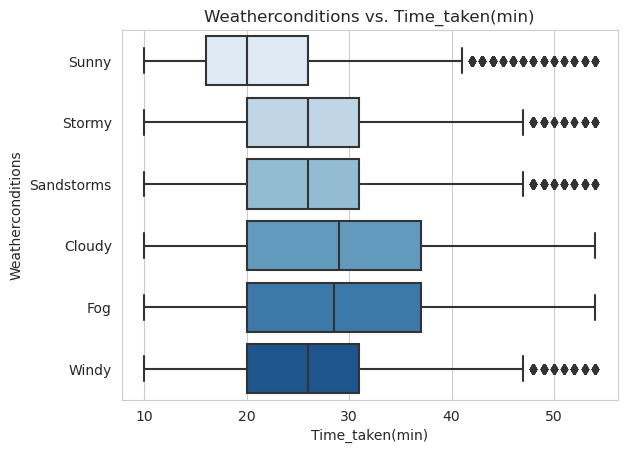

In [101]:
sns.boxplot(data = data, y= 'Weatherconditions', x = 'Time_taken(min)', palette = 'Blues')
plt.title('Weatherconditions vs. Time_taken(min)');

In [ ]:
plt.figure(figsize = (15, 3))
sns.boxplot(data = data, y = 'Time_taken(min)', x = 'DeliveryDistance', hue = 'Weatherconditions');